## Resources : http://people.duke.edu/~ccc14/sta-663-2017/05_Numbers.html

In [2]:
import numpy as np

The base structure in numpy is ndarray, used to represent vectors, matrices and higher-dimensional arrays. Each ndarray has the following attributes:

---dtype = corresponds to data types in C

---shape = dimensions of array

---strides = number of bytes to step in each direction when traversing the array

In [2]:
x = np.array([1,2,3,4,5,6]) #example 1
print(x)
print('dytpe', x.dtype)
print('shape', x.shape)
print('strides', x.strides)

[1 2 3 4 5 6]
dytpe int32
shape (6,)
strides (4,)


In [3]:
x.shape = (2,3) #example 2
print(x)
print('dytpe', x.dtype)
print('shape', x.shape)
print('strides', x.strides)

[[1 2 3]
 [4 5 6]]
dytpe int32
shape (2, 3)
strides (12, 4)


In [4]:
x = x.astype('complex') #example 3
print(x)
print('dytpe', x.dtype)
print('shape', x.shape)
print('strides', x.strides)

[[ 1.+0.j  2.+0.j  3.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]
dytpe complex128
shape (2, 3)
strides (48, 16)


## Array Creation

In [5]:
np.array([1,2,3])

array([1, 2, 3])

In [6]:
np.array([1,2,3], np.float64)

array([ 1.,  2.,  3.])

In [7]:
np.arange(3)  # from 0 to 2 inclusive

array([0, 1, 2])

In [9]:
np.arange(3,6,0.5) # from 3 to less than 6, step size 0.5

array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5])

In [11]:
np.array([[1,2,3],[4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
np.ones(3) #function to print '1'...print three 1s

array([ 1.,  1.,  1.])

In [16]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [17]:
np.eye(4) # 4x4 dimensional ndarray....floating point...only 1s at diagonals, all other 0s

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [18]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [29]:
np.fromfunction(lambda i,j : i**2+j**2, (4,5))

array([[  0.,   1.,   4.,   9.,  16.],
       [  1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.],
       [  9.,  10.,  13.,  18.,  25.]])

## Array manipulation

In [4]:
x = np.fromfunction(lambda i,j : i**2+j**2, (4,5))
x.shape # gives the dimension of x

(4, 5)

In [5]:
x.size  # gives the total nuumber of elements present in x

20

In [6]:
x.dtype

dtype('float64')

In [7]:
x.astype(np.int64)

array([[ 0,  1,  4,  9, 16],
       [ 1,  2,  5, 10, 17],
       [ 4,  5,  8, 13, 20],
       [ 9, 10, 13, 18, 25]], dtype=int64)

In [8]:
x.T #transposed ndarray of x

array([[  0.,   1.,   4.,   9.],
       [  1.,   2.,   5.,  10.],
       [  4.,   5.,   8.,  13.],
       [  9.,  10.,  13.,  18.],
       [ 16.,  17.,  20.,  25.]])

In [9]:
x.reshape(2,-1)

array([[  0.,   1.,   4.,   9.,  16.,   1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.,   9.,  10.,  13.,  18.,  25.]])

## Array indexing

In [10]:
x

array([[  0.,   1.,   4.,   9.,  16.],
       [  1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.],
       [  9.,  10.,  13.,  18.,  25.]])

In [11]:
x[0]

array([  0.,   1.,   4.,   9.,  16.])

In [12]:
x[0,:] #all columns of the first row

array([  0.,   1.,   4.,   9.,  16.])

In [15]:
x[:,0] #all rows of the first column

array([ 0.,  1.,  4.,  9.])

In [16]:
x[-1] #similar indexing system to lists

array([  9.,  10.,  13.,  18.,  25.])

In [17]:
x[1,1]

2.0

In [18]:
x[:, 1:3] # all rows of 1<= columns_index <3

array([[  1.,   4.],
       [  2.,   5.],
       [  5.,   8.],
       [ 10.,  13.]])

### Boolean indexing

In [19]:
x >= 2 #answer array comes as true or false

array([[False, False,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [20]:
x[ x>2 ] # show, as a list, only those satisfying the condition x>2

array([  4.,   9.,  16.,   5.,  10.,  17.,   4.,   5.,   8.,  13.,  20.,
         9.,  10.,  13.,  18.,  25.])

### Fancy indexing

In [23]:
x[0, [1,2]] #zero-th row's 1st&2nd index columns only

array([ 1.,  4.])

## Calculaions and Broadcastin

### Broadcasting refers to the set of rules that numpy uses to perfrom operations on arrays with different shapes. See official documentation( https://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html ) for a clear explanation of the rules. Array shapes can be manipulated using the reshape method or by inserting a new axis with np.newaxis. Note that np.newaxis is an alias for None, which is sometimes used in examples.

In [5]:
x = np.fromfunction(lambda i, j: i**2+j**2, (2,3))
x

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [4]:
x * 5  #multiplying each element by 5

array([[  0.,   5.,  20.],
       [  5.,  10.,  25.]])

In [5]:
x + x #adding eah elemnt by itself

array([[  0.,   2.,   8.],
       [  2.,   4.,  10.]])

In [6]:
x @ x.T

array([[ 17.,  22.],
       [ 22.,  30.]])

In [7]:
x.T @ x

array([[  1.,   2.,   5.],
       [  2.,   5.,  14.],
       [  5.,  14.,  41.]])

In [8]:
np.log1p(x)  #ln 2 multiplied by every element of x

array([[ 0.        ,  0.69314718,  1.60943791],
       [ 0.69314718,  1.09861229,  1.79175947]])

In [9]:
np.exp(x)    #value of e multiplied by every elemnt of x

array([[   1.        ,    2.71828183,   54.59815003],
       [   2.71828183,    7.3890561 ,  148.4131591 ]])

## Combining and splitting arrays

In [6]:
x

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [13]:
# combining two x arrays...entire rows are added below
np.r_[x, x]

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [16]:
np.vstack([x, x])

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [29]:
#same as the previous 2 if axis=0...othewise for axis=1, double elements in each list
np.concatenate([x, x], axis=0)

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [32]:
#combining two x arrays...entire columns are added after every list-element
np.c_[x,x]

array([[ 0.,  1.,  4.,  0.,  1.,  4.],
       [ 1.,  2.,  5.,  1.,  2.,  5.]])

In [33]:
np.hstack([x, x]) # column-wise version of vstack

array([[ 0.,  1.,  4.,  0.,  1.,  4.],
       [ 1.,  2.,  5.,  1.,  2.,  5.]])

In [34]:
# the column-wise version....comes for axis=1
np.concatenate([x,x], axis=1) 

array([[ 0.,  1.,  4.,  0.,  1.,  4.],
       [ 1.,  2.,  5.,  1.,  2.,  5.]])

In [7]:
# saving into a different variable
y = np.r_[x, x]
y

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [39]:
# column-wise splitting of y is done here : 
a, b, c = np.hsplit(y, 3) #here 3 menas number of produced columns
a

array([[ 0.],
       [ 1.],
       [ 0.],
       [ 1.]])

In [40]:
b

array([[ 1.],
       [ 2.],
       [ 1.],
       [ 2.]])

In [41]:
c

array([[ 4.],
       [ 5.],
       [ 4.],
       [ 5.]])

In [42]:
# row-wise splitting done...displayed only the 4th row separately
np.vsplit(y, [3])

[array([[ 0.,  1.,  4.],
        [ 1.,  2.,  5.],
        [ 0.,  1.,  4.]]), array([[ 1.,  2.,  5.]])]

In [46]:
a,b,c,d = np.vsplit(y,4) #here 4 menas number of produced columns
d

array([[ 1.,  2.,  5.]])

In [49]:
# same operation as vsplit....but axis=0 means row-wise
np.split(y, [3], axis=0)

[array([[ 0.,  1.,  4.],
        [ 1.,  2.,  5.],
        [ 0.,  1.,  4.]]), array([[ 1.,  2.,  5.]])]

In [50]:
np.hstack(np.hsplit(y, 3))
# here firstly, hsplit splits the array into 3 columns
# secondly, then, the three columns are joined side-by-side by hstack

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

## Reductions

In [8]:
y

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [9]:
y.sum()

26.0

In [10]:
y.sum(0) #sum of the individual columns

array([  2.,   6.,  18.])

In [11]:
y.sum(1) #sum of the individual rows

array([ 5.,  8.,  5.,  8.])

### Standardize by column mean and standard deviation

In [18]:
y.mean(0) , y.std(0)

(array([ 0.5,  1.5,  4.5]), array([ 0.5,  0.5,  0.5]))

In [16]:
z = (y - y.mean(0))/y.std(0)
z

array([[-1., -1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [17]:
#now the column mean and std values are changed coz the array is standardized
z.mean(0) , z.std(0)

(array([ 0.,  0.,  0.]), array([ 1.,  1.,  1.]))

### Standardize by row mean and standard deviation

In [19]:
y.mean(1) , y.std(1)

(array([ 1.66666667,  2.66666667,  1.66666667,  2.66666667]),
 array([ 1.69967317,  1.69967317,  1.69967317,  1.69967317]))

In [20]:
z = (y - y.mean(1)[:,None])/y.std(1)[:,None]
z

array([[-0.98058068, -0.39223227,  1.37281295],
       [-0.98058068, -0.39223227,  1.37281295],
       [-0.98058068, -0.39223227,  1.37281295],
       [-0.98058068, -0.39223227,  1.37281295]])

In [21]:
z.mean(1) , z.std(1)

(array([ -7.40148683e-17,   7.40148683e-17,  -7.40148683e-17,
          7.40148683e-17]), array([ 1.,  1.,  1.,  1.]))

## Example: Calculating pairwise distance matrix using broadcasting and vectorization

Calculate the pairwise distance matrix between the following points:
(0,0),(4,0),(4,3),(0,3)

In [2]:
def distance_matrix_py(pts):
    """Returns matrix of pairwise Euclidean distances. Pure Python version."""
    n = len(pts)
    p = len(pts[0])
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i,k] - pts[j,k])**2
            m[i, j] = s**0.5
    return m

In [3]:
def distance_matrix_np(pts):
    """Returns matrix of pairwise Euclidean distances. Vectorized numpy version."""
    return np.sum((pts[None,:] - pts[:, None])**2, -1)**0.5

In [4]:
pts = np.array([(0,0), (4,0), (4,3), (0,3)])
pts

array([[0, 0],
       [4, 0],
       [4, 3],
       [0, 3]])

In [6]:
pts.shape

(4, 2)

In [7]:
# with using normal np functions and nothing else
n = pts.shape[0]
p = pts.shape[1]
dist = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        s=0
        for k in range(p):
            s += (pts[i, k] - pts[j, k])**2
        dist[i, j] = np.sqrt(s)

dist

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

### Using broadcasting:

In [8]:
pts[None, :].shape

(1, 4, 2)

In [9]:
pts[:, None].shape

(4, 1, 2)

In [11]:
m = pts[None, :] - pts[:, None]
m

array([[[ 0,  0],
        [ 4,  0],
        [ 4,  3],
        [ 0,  3]],

       [[-4,  0],
        [ 0,  0],
        [ 0,  3],
        [-4,  3]],

       [[-4, -3],
        [ 0, -3],
        [ 0,  0],
        [-4,  0]],

       [[ 0, -3],
        [ 4, -3],
        [ 4,  0],
        [ 0,  0]]])

In [13]:
(m**2).shape

(4, 4, 2)

In [16]:
# We want to end up with a 4 by 4 matrix, so sum over the axis with dimension 2. 
# This is axis=2, or axis=-1 since it is the first axis from the end
squared = np.sum((pts[None, :] - pts[:, None])**2, -1)
squared

array([[ 0, 16, 25,  9],
       [16,  0,  9, 25],
       [25,  9,  0, 16],
       [ 9, 25, 16,  0]])

In [18]:
dist = np.sqrt(squared)
dist

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

### the distance matrix can be calculated in one line of numpy code:

In [19]:
dist

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

#### Let’s put them in functions and compare the time.

In [20]:
def pdist1(pts):
    n = pts.shape[0]
    p = pts.shape[1]
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i, k] - pts[j, k])**2
            dist[i, j] = s
    return np.sqrt(dist)

In [21]:
def pdist2(pts):
    return np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

In [22]:
np.alltrue(pdist1(pts) == pdist2(pts))  # answers are same

True

In [23]:
%timeit pdist1(pts)

10000 loops, best of 3: 27.9 µs per loop


In [24]:
%timeit pdist2(pts)

The slowest run took 9.06 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.34 µs per loop


So second one is of course better than usual loops, right? :D

#### But don’t give up on loops yet

In [25]:
from numba import njit

@njit
def pdist3(pts):
    n = pts.shape[0]
    p = pts.shape[1]
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i, k] - pts[j, k])**2
            dist[i, j] = s
    return np.sqrt(dist)

In [26]:
%timeit pdist3(pts)

The slowest run took 1023206.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 1.51 µs per loop


But in this case, using numba package, loops do the best timed algo...how awesome is that? ;)
This is 3-5 times faster than the broadcasting version! We have just performed Just In Time (JIT) compilation of a function.

## Example: Consructing leave-one-out arrays

#### Another example of numpy trickery is to construct a leave-one-out matrix of a vector of length k. In the matrix, each row is a vector of length k-1, with a different vector component dropped each time. This can be used for LOOCV to evalaute the out-of-sample accuracy of a predictive model.

#### For example, suppose you have data points [(1,4), (2,7), (3,11), (4,9), (5,15)] that you want to perfrom LOOCV on for a simple regression model. For each cross-validation, you use one point for testing, and the remaining 4 points for training. In other words, you want the training set to be:

In [ ]:
[(2,7), (3,11), (4,9), (5,15)]
[(1,4), (3,11), (4,9), (5,15)]
[(1,4), (2,7),  (4,9), (5,15)]
[(1,4), (2,7), (3,11), (5,15)]
[(1,4), (2,7), (3,11), (4,9)]

#### Here is one way to do create the training set using numpy tricks:

In [3]:
# Create a triangular matrix with N rows, N-1 columns and offset from diagnonal by -1
N = 5
np.tri(N)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [4]:
np.tri(N, N-1) 

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [5]:
np.tri(N, N-1, -1)      # our required triangular matrix

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.]])

#### Use broadcasting to create a new index matrix:

In [6]:
np.arange(1,N)

array([1, 2, 3, 4])

In [7]:
np.arange(1,N) - np.tri(N,N-1,-1)

array([[ 1.,  2.,  3.,  4.],
       [ 0.,  2.,  3.,  4.],
       [ 0.,  1.,  3.,  4.],
       [ 0.,  1.,  2.,  4.],
       [ 0.,  1.,  2.,  3.]])

In [8]:
idx = np.arange(1, N) - np.tri(N, N-1, -1).astype('int') #converting the matrix to integer
idx

array([[1, 2, 3, 4],
       [0, 2, 3, 4],
       [0, 1, 3, 4],
       [0, 1, 2, 4],
       [0, 1, 2, 3]])

In [9]:
data = np.array([(1,4), (2,7), (3,11), (4,9), (5,15)])   #loading data
data

array([[ 1,  4],
       [ 2,  7],
       [ 3, 11],
       [ 4,  9],
       [ 5, 15]])

In [10]:
data[idx] #loading the data according to the index told in "idx" 

array([[[ 2,  7],
        [ 3, 11],
        [ 4,  9],
        [ 5, 15]],

       [[ 1,  4],
        [ 3, 11],
        [ 4,  9],
        [ 5, 15]],

       [[ 1,  4],
        [ 2,  7],
        [ 4,  9],
        [ 5, 15]],

       [[ 1,  4],
        [ 2,  7],
        [ 3, 11],
        [ 5, 15]],

       [[ 1,  4],
        [ 2,  7],
        [ 3, 11],
        [ 4,  9]]])

### All but one

#### R uses negative indexing to mean delete the component at that index. Because Python uses negative indexing to mean count from the end, we have to do a little more work to get the same effect. Here are two ways of deleting one item from a vector.

In [12]:
def f1(a, k):
    idx = np.ones_like(a).astype('bool')
    idx[k] = 0
    return a[idx]
def f2(a, k):
     return np.r_[a[:k], a[k+1:]]

a = np.arange(100)
k = 50

In [14]:
%timeit f1(a,k)

The slowest run took 21.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.82 µs per loop


In [15]:
%timeit f2(a,k)

The slowest run took 11.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.6 µs per loop


### Universal functions (Ufuncs)

#### Functions that work on both scalars and arrays are known as ufuncs. For arrays, ufuncs apply the function in an element-wise fashion. Use of ufuncs is an esssential aspect of vectorization and typically much more computationally efficient than using an explicit loop over each element.

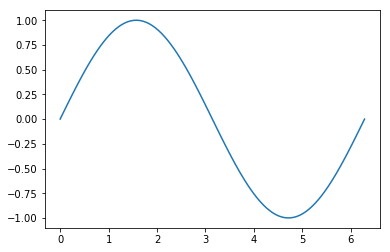

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs) # np.sin is a universal function
plt.plot(xs, ys)

## Generalized ufuncs

### A universal function performs vectorized looping over scalars. A generalized ufunc performs looping over vectors or arrays. Currently, numpy only ships with a single generalized ufunc. However, they play an important role for JIT compilation with numba

In [17]:
from numpy.core.umath_tests import matrix_multiply

print(matrix_multiply.signature)

(m,n),(n,p)->(m,p)


In [21]:
us = np.random.random((5, 2, 3)) # 5 2x3 matrics
vs = np.random.random((5, 3, 4)) # 5 3x4 matrices

In [22]:
us

array([[[ 0.13566738,  0.86785633,  0.73996909],
        [ 0.70228586,  0.2794491 ,  0.272884  ]],

       [[ 0.43916232,  0.91863349,  0.34701369],
        [ 0.75189822,  0.36527886,  0.22971563]],

       [[ 0.82562433,  0.04195364,  0.3532773 ],
        [ 0.32710384,  0.78267527,  0.14794354]],

       [[ 0.45700654,  0.79201417,  0.66864525],
        [ 0.02475956,  0.23535829,  0.35244277]],

       [[ 0.409229  ,  0.98941224,  0.13459677],
        [ 0.59416199,  0.34219432,  0.78009965]]])

In [23]:
vs

array([[[ 0.39236252,  0.70972918,  0.54176146,  0.3282748 ],
        [ 0.00449175,  0.21701736,  0.67021834,  0.81085106],
        [ 0.18317962,  0.01380683,  0.31902741,  0.70066462]],

       [[ 0.19780723,  0.78646884,  0.27160283,  0.05515587],
        [ 0.8673649 ,  0.73312303,  0.95835231,  0.50469033],
        [ 0.95031863,  0.67361884,  0.16012174,  0.09458822]],

       [[ 0.31033527,  0.21366681,  0.04660231,  0.38174231],
        [ 0.67413449,  0.82213706,  0.66371733,  0.63389365],
        [ 0.56354228,  0.50562143,  0.8049138 ,  0.01387299]],

       [[ 0.80783421,  0.113919  ,  0.46124174,  0.95525859],
        [ 0.3729942 ,  0.45952547,  0.62541202,  0.36829257],
        [ 0.61676826,  0.91446411,  0.10551463,  0.80745067]],

       [[ 0.07285779,  0.59629977,  0.25211427,  0.94268918],
        [ 0.99865617,  0.500711  ,  0.50222668,  0.57472348],
        [ 0.92613753,  0.62698498,  0.64370936,  0.19163771]]])

In [24]:
# perform matrix multiplication for each of the 5 sets of matrices
ws = matrix_multiply(us, vs)
ws.shape

(5, 2, 4)

In [25]:
ws

array([[[ 0.19267625,  0.29484362,  0.89122301,  1.26670857],
        [ 0.32679266,  0.56284574,  0.6548208 ,  0.64833451]],

       [[ 1.2134335 ,  1.2526138 ,  1.05521669,  0.52067123],
        [ 0.68386401,  1.01387964,  0.59106599,  0.2475527 ]],

       [[ 0.48358944,  0.38952474,  0.35067914,  0.3466709 ],
        [ 0.71251269,  0.788161  ,  0.65380073,  0.62305468]],

       [[ 1.07700138,  1.0274645 ,  0.77667752,  1.26815041],
        [ 0.32516441,  0.43326997,  0.19580391,  0.39491264]],

       [[ 1.14255327,  0.8238229 ,  0.68672289,  0.98020801],
        [ 1.10750336,  1.01474988,  0.82381327,  0.90627369]]])

## Saving and Loading NDarrays

### Saving to and loading from text files:

In [26]:
x1 = np.arange(1,10).reshape(3,3)
x1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
np.savetxt('x1.txt', x1)
!cat x1.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
!cat x1.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
x2 = np.loadtxt('x1.txt')
x2

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

## Saving to and loading from binary files (much faster and also preserves dtype)

In [33]:
np.save('x1.npy', x1)

In [35]:
!cat x1.npy

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
x3 = np.load('x1.npy')
x3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Version information

In [51]:
import numpy
numpy.version.version

'1.12.1'

In [47]:
import numba
print(numba.__version__)

0.33.0


In [53]:
import matplotlib
print(matplotlib.__version__)

2.0.2


In [55]:
import numpy, numba, matplotlib
print(numpy.version.version, numba.__version__, matplotlib.__version__)

1.12.1 0.33.0 2.0.2
